***
# EDA emotions_with_neutrals_220228.csv dataset
Concatenated the neutrals from Kaggle dataset with Huggingface dataset<br>
https://github.com/dair-ai/emotion_dataset<br>
https://huggingface.co/datasets/dair-ai/emotion
***

***
## 1 Load the dataset

In [1]:
import pandas as pd
import numpy as np
import random

from google.colab import drive 
drive.mount('/content/gdrive')

project_folder = '/content/gdrive/MyDrive/266_Final_Project_Folder'

# read from the google drive
source = project_folder + '/datasets/emotions_with_neutrals_220228.csv'

# Load the csv
df = pd.read_csv(source)

print(df.head())

Mounted at /content/gdrive
   Unnamed: 0                                               text emotions
0       27383  i feel awful about it too because it s my job ...  sadness
1      110083                              im alone i feel awful  sadness
2      140764  ive probably mentioned this before but i reall...      joy
3      100071           i was feeling a little low few days back  sadness
4        2837  i beleive that i am much more sensitive to oth...     love


In [2]:
# get duplicate records based on the 'text' column
duplicate_df = df[df.duplicated(subset='text', keep=False)].sort_values('text')

duplicate_df

Unnamed: 0                                               text emotions
423458       31332  #frenchieb-day #frenchieb-day #frenchieb-day #...  neutral
423467       31363  #frenchieb-day #frenchieb-day #frenchieb-day #...  neutral
423369       30929  #frenchieb-day #frenchieb-day #frenchieb-day #...  neutral
425308       39415                                                  0  neutral
419611       15028                                                  0  neutral
...            ...                                                ...      ...
48464          941                           when my grandfather died  sadness
313194         955                           when my grandmother died  sadness
340186         948                           when my grandmother died  sadness
131282        2112                                          yesterday    anger
383303        1053                                          yesterday      joy

[45843 rows x 3 columns]

In [3]:
df.shape

(425447, 3)

In [4]:
duplicate_df.shape

(45843, 3)

In [5]:
df.shape[0] - duplicate_df.shape[0]

379604

In [6]:
# create boolean mask for rows in df where the value 
# in the 'text' column is also in duplicate_df
mask = df['text'].isin(duplicate_df['text'])

# exclude rows in df where the 'text' value is also in duplicate_df
df = df[~mask]

df.shape

(379604, 3)

***
## 2 Basic EDA

### Datatypes for each of the columns in our dataframe

In [7]:
print(df.dtypes)

Unnamed: 0     int64
text          object
emotions      object
dtype: object


### Unique types and count of sentiments in the dataset

In [8]:
df.shape

(379604, 3)

In [9]:
# returns a dataframe with emotions as rows and count of those emotions and percentage of total in that df
def get_proportions(data):
  # get the value counts of each unique value
  counts = data.value_counts()

  # convert the counts to percentages
  percentages = counts / counts.sum() * 100

  return pd.DataFrame({'count': counts, 'percentage': percentages})  

In [10]:
# original (with dupes)
cp_df = get_proportions(df['emotions'])
cp_df

count  percentage
joy       129165   34.026248
sadness   115868   30.523388
anger      52260   13.766978
fear       39554   10.419806
love       24335    6.410628
surprise    9821    2.587170
neutral     8601    2.265782

### Max and min lengths of words in the text

In [11]:
import statistics

# Apply the lambda function to the 'content' column and list called word_count_list'
word_count_list = list(df['text'].apply(lambda x: len(x.split(' '))))

# display the maximum and minimum lengths
print('Maximum word length:', max(word_count_list))
print('Minimum word length:', min(word_count_list))
print('Mean word length:', statistics.mean(word_count_list))
print('Median word length:', statistics.median(word_count_list))
print('75th percentile word length:', np.percentile(word_count_list, 75))
print('85th percentile word length:', np.percentile(word_count_list, 85))
print('95th percentile word length:', np.percentile(word_count_list, 95))

Maximum word length: 178
Minimum word length: 1
Mean word length: 18.988875248943636
Median word length: 17.0
75th percentile word length: 25.0
85th percentile word length: 30.0
95th percentile word length: 41.0


(array([1.6520e+03, 1.9258e+04, 2.8868e+04, 3.0132e+04, 3.0559e+04,
        3.0795e+04, 2.9678e+04, 2.8180e+04, 2.5960e+04, 2.3612e+04,
        2.0976e+04, 1.8412e+04, 2.3069e+04, 1.2315e+04, 1.0148e+04,
        8.5790e+03, 7.1450e+03, 5.8120e+03, 4.8540e+03, 4.1300e+03,
        3.2930e+03, 2.7890e+03, 2.2730e+03, 1.9000e+03, 2.2390e+03,
        1.1120e+03, 7.9100e+02, 4.8000e+02, 3.0400e+02, 1.5500e+02,
        6.6000e+01, 3.3000e+01, 1.4000e+01, 3.0000e+00, 2.0000e+00,
        4.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

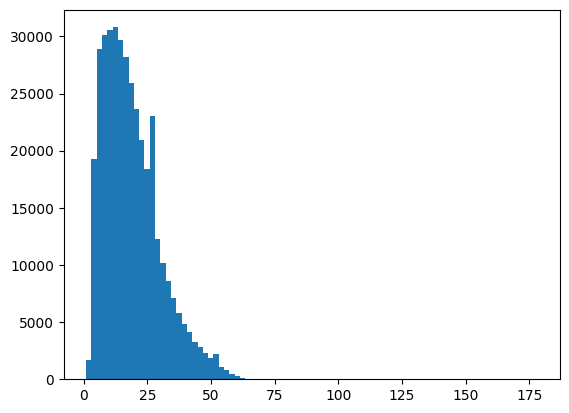

In [12]:
import matplotlib.pyplot as plt

plt.hist(word_count_list, bins=len(set(word_count_list)))

***
## 3 Split dataset into test/train/validation (imbalanced using stratify)

### Drop tweet_id column

In [13]:
df = df.drop(columns='Unnamed: 0')
print(df.dtypes)

text        object
emotions    object
dtype: object


### Split the dataset: test = 10%, initial train = 90% then split initial train further: train = 75% of initial train, validation = 25% of initial train. Stratifying the dataset to keep proportions. Shuffling for randomization.

In [14]:
from sklearn.model_selection import train_test_split

# a function to split data (doing this a lot in this notebook)
def data_splitter(data_df, test_pct, train_pct):
  return train_test_split(data_df['text'], data_df['emotions'],
                                                      test_size=test_pct,
                                                      train_size=train_pct,
                                                      stratify=data_df['emotions'],
                                                      shuffle=True,
                                                      random_state=11) # make sure this is reliable

In [15]:
def check_overlap(text_of_df1, text_of_df2):
  # Check if there are any records in train that are in val
  overlap = text_of_df1.isin(text_of_df2)
  print(f"Number of overlapping records (df1 in df2): {overlap.sum()}")

  # Check if there are any records in val that are in train
  overlap = text_of_df2.isin(text_of_df1)
  print(f"Number of overlapping records (df2 in df1): {overlap.sum()}")

##### Set aside 10% for test data

In [16]:
X_train, X_test, y_train, y_test = data_splitter(df, test_pct=0.1, train_pct=0.9)

In [17]:
# Make sure no overlapping records between training and test data
# Make sure no overlapping records between test data and training data
print('df1 = X_train, df2 = X_test')
check_overlap(X_train, X_test)

df1 = X_train, df2 = X_test
Number of overlapping records (df1 in df2): 0
Number of overlapping records (df2 in df1): 0


##### Split initial 90% training data into 75% train and 25% validation

In [18]:
X_train, X_val, y_train, y_val = data_splitter(pd.DataFrame({'text': X_train, 'emotions': y_train}), test_pct=0.25, train_pct=0.75)

In [19]:
# Make sure no overlapping records between training and val data
# Make sure no overlapping records between val data and training data
print('df1 = X_train, df2 = X_val')
check_overlap(X_train, X_val)

df1 = X_train, df2 = X_val
Number of overlapping records (df1 in df2): 0
Number of overlapping records (df2 in df1): 0


### Check to see if splits are correct

In [20]:
print('X_train:', len(X_train))
print('X_test:', len(X_test))
print('X_val:', len(X_val))

print('X_train proportion:', len(X_train) / len(df)) # 90% * 75% = 0.675
print('X_test proportion:', len(X_test) / len(df)) # 10% = 0.10
print('X_val proportion:', len(X_val) / len(df))  # 90% * 25% = 0.225

X_train: 256232
X_test: 37961
X_val: 85411
X_train proportion: 0.6749981559730667
X_test proportion: 0.10000158059451428
X_val proportion: 0.22500026343241905


### Check to see if the proportions of each class in each dataset are still the same

In [21]:
# reminder of proportions of full df
print(cp_df)

           count  percentage
joy       129165   34.026248
sadness   115868   30.523388
anger      52260   13.766978
fear       39554   10.419806
love       24335    6.410628
surprise    9821    2.587170
neutral     8601    2.265782


In [26]:
# check training df proportions
y_train_proportions = get_proportions(y_train)
print('Training dataset proportions')
y_train_proportions

Training dataset proportions


count  percentage
joy       87186   34.026195
sadness   78211   30.523510
anger     35275   13.766821
fear      26699   10.419854
love      16426    6.410597
surprise   6629    2.587109
neutral    5806    2.265915

In [27]:
# check test df proportions
y_test_proportions = get_proportions(y_test)
print('Test dataset proportions')
y_test_proportions

Test dataset proportions


count  percentage
joy       12917   34.027028
sadness   11587   30.523432
anger      5226   13.766761
fear       3955   10.418587
love       2434    6.411844
surprise    982    2.586865
neutral     860    2.265483

In [29]:
# check val df proportions
y_val_proportions = get_proportions(y_val)
print('Validation dataset\nproportions')
y_val_proportions

Validation dataset
proportions


count  percentage
joy       29062   34.026062
sadness   26070   30.523001
anger     11759   13.767548
fear       8900   10.420203
love       5475    6.410181
surprise   2210    2.587489
neutral    1935    2.265516

In [ ]:
print('yay!!')

yay!!


### Make csv of train, test, validation datasets

In [ ]:
train_df = pd.DataFrame({'text': X_train, 'emotions': y_train})
train_df.to_csv(project_folder + '/datasets/train_data_imbalanced_stratified_no_dupe.csv')

In [33]:
test_df = pd.DataFrame({'text': X_test, 'emotions': y_test})
test_df.to_csv(project_folder + '/datasets/test_data_imbalanced_stratified_no_dupe.csv')

In [ ]:
val_df = pd.DataFrame({'text': X_val, 'emotions': y_val})
val_df.to_csv(project_folder + '/datasets/validation_data_imbalanced_stratified_no_dupe.csv')

#### Make a balanced test set from the existing test_df set

In [31]:
# What's the lowest count in the test_df? Use that number as max count in balanced_test_df
min_of_test_df = y_test_proportions['count'].min()
print(y_test_proportions['count'].min())

860


In [34]:
# used min_of_test_df because it's the smallest number in the test_df
balanced_test_df = test_df.groupby('emotions').sample(n=min_of_test_df, random_state=11)
balanced_test_df

text  emotions
280292  i will get at the heart of the matter that you...     anger
384080             i still feel selfish about it at times     anger
183885   i feel a sarcastic emptyness and void in my life     anger
401184  overeating a traditional type of food blood pu...     anger
280878  i just have this feeling that im going to be b...     anger
...                                                   ...       ...
84245     i am giving myself permission to feel funny aga  surprise
408636                      i feel shocked angry confused  surprise
269676  im writing this blog post and feeling totally ...  surprise
170487  i feel this for all my grandchildren and with ...  surprise
295457  i think that s the prevailing feeling with all...  surprise

[6020 rows x 2 columns]

In [36]:
# verify that the balanced_test_df is actually balanced
print('Balanced test set')
get_proportions(balanced_test_df['emotions'])

Balanced test set


count  percentage
anger       860   14.285714
fear        860   14.285714
joy         860   14.285714
love        860   14.285714
neutral     860   14.285714
sadness     860   14.285714
surprise    860   14.285714

In [ ]:
# write to CSV
balanced_test_df.to_csv(project_folder + '/datasets/test_data_balanced_no_dupe.csv')

# Make smaller train/val datasets from existing train/val datasets

In [ ]:
train_df

text  emotions
284159                    ive been feeling rather jealous     anger
322367       ive officially started to feel uncomfortable      fear
19072   im acting like the rotten person i am who feel...   sadness
249347                            i feel a mournful grasp   sadness
22174                              i started to feel smug       joy
...                                                   ...       ...
339466  i don t get that one feeling anymore just curi...  surprise
409868  i was feeling a little unhappy in almost all a...   sadness
375320  i was there and soon to be berlin feeling gloo...   sadness
48829   im feeling a little too violent and my mother ...     anger
340308  i wake up already feeling listless and have be...   sadness

[256232 rows x 2 columns]

In [ ]:
val_df

text emotions
181134    im starting to feel a lot less terrified of her     fear
133014  i can t appease everyone my lives are mainly i...  sadness
396746  i feel for him is so valuable absolute and rar...      joy
1316    i am friendly and so easy to talk to if only y...     fear
72811   i came into the game feeling a bit lonely and ...  sadness
...                                                   ...      ...
404463  i miss feeling insulted or feeling discouraged...    anger
75314               i feel like they liked my rough draft     love
291225  i just need to adjust my mindset to feel pleas...      joy
179044  id be working a max of hours if theyre feeling...      joy
277153  i feel very strongly against fake trees but si...  sadness

[85411 rows x 2 columns]

In [ ]:
train_df.shape[0] + val_df.shape[0]

341643

In [ ]:
full_train_df = pd.concat([train_df, val_df], axis=0)
full_train_df.shape

(341643, 2)

#### 17k training, 5k validation

In [ ]:
X_train, X_val, y_train, y_val = data_splitter(full_train_df, test_pct=0.015, train_pct=0.05)

In [ ]:
X_train.shape

(17082,)

In [ ]:
X_val.shape

(5125,)

In [ ]:
check_overlap(X_train, X_val)

Number of overlapping records (df1 in df2): 0
Number of overlapping records (df2 in df1): 0


In [ ]:
train_df_17k_5k = pd.DataFrame({'text': X_train, 'emotions': y_train})
train_df_17k_5k.to_csv(project_folder + '/datasets/train_data_imbalanced_stratified_no_dupe_17k_5k.csv')
val_df_17k_5k = pd.DataFrame({'text': X_val, 'emotions': y_val})
val_df_17k_5k.to_csv(project_folder + '/datasets/validation_data_imbalanced_stratified_no_dupe_17k_5k.csv')

In [ ]:
print(get_proportions(train_df_17k_5k['emotions']))

          count  percentage
joy        5812   34.024119
sadness    5214   30.523358
anger      2352   13.768880
fear       1780   10.420325
love       1095    6.410256
surprise    442    2.587519
neutral     387    2.265543


In [ ]:
print(get_proportions(val_df_17k_5k['emotions']))

          count  percentage
joy        1744   34.029268
sadness    1564   30.517073
anger       706   13.775610
fear        534   10.419512
love        328    6.400000
surprise    133    2.595122
neutral     116    2.263415


#### 34k training, 10k validation

In [ ]:
X_train, X_val, y_train, y_val = data_splitter(full_train_df, test_pct=0.03, train_pct=0.1)

In [ ]:
X_train.shape

(34164,)

In [ ]:
X_val.shape

(10250,)

In [ ]:
check_overlap(X_train, X_val)

Number of overlapping records (df1 in df2): 0
Number of overlapping records (df2 in df1): 0


In [ ]:
train_df_34k_10k = pd.DataFrame({'text': X_train, 'emotions': y_train})
train_df_34k_10k.to_csv(project_folder + '/datasets/train_data_imbalanced_stratified_no_dupe_34k_10k.csv')
val_df_34k_10k = pd.DataFrame({'text': X_val, 'emotions': y_val})
val_df_34k_10k.to_csv(project_folder + '/datasets/validation_data_imbalanced_stratified_no_dupe_34k_10k.csv')

In [ ]:
print(get_proportions(train_df_34k_10k['emotions']))

          count  percentage
joy       11625   34.027046
sadness   10428   30.523358
anger      4703   13.765952
fear       3560   10.420325
love       2190    6.410256
surprise    884    2.587519
neutral     774    2.265543


In [ ]:
print(get_proportions(val_df_34k_10k['emotions']))

          count  percentage
joy        3488   34.029268
sadness    3129   30.526829
anger      1411   13.765854
fear       1068   10.419512
love        657    6.409756
surprise    265    2.585366
neutral     232    2.263415


#### 68k training, 20k validation

In [ ]:
X_train, X_val, y_train, y_val = data_splitter(full_train_df, test_pct=0.06, train_pct=0.2)

In [ ]:
X_train.shape

(68328,)

In [ ]:
X_val.shape

(20499,)

In [ ]:
check_overlap(X_train, X_val)

Number of overlapping records (df1 in df2): 0
Number of overlapping records (df2 in df1): 0


In [ ]:
train_df_68k_20k = pd.DataFrame({'text': X_train, 'emotions': y_train})
train_df_68k_20k.to_csv(project_folder + '/datasets/train_data_imbalanced_stratified_no_dupe_68k_20k.csv')
val_df_68k_20k = pd.DataFrame({'text': X_val, 'emotions': y_val})
val_df_68k_20k.to_csv(project_folder + '/datasets/validation_data_imbalanced_stratified_no_dupe_68k_20k.csv')

In [ ]:
print(get_proportions(train_df_68k_20k['emotions']))

          count  percentage
joy       23249   34.025582
sadness   20856   30.523358
anger      9407   13.767416
fear       7120   10.420325
love       4380    6.410256
surprise   1768    2.587519
neutral    1548    2.265543


In [ ]:
print(get_proportions(val_df_68k_20k['emotions']))

          count  percentage
joy        6975   34.026050
sadness    6257   30.523440
anger      2822   13.766525
fear       2136   10.420020
love       1314    6.410069
surprise    530    2.585492
neutral     465    2.268403


#### 136k train, 40k validation

In [ ]:
X_train, X_val, y_train, y_val = data_splitter(full_train_df, test_pct=0.12, train_pct=0.4)

In [ ]:
X_train.shape

(136657,)

In [ ]:
X_val.shape

(40998,)

In [ ]:
check_overlap(X_train, X_val)

Number of overlapping records (df1 in df2): 0
Number of overlapping records (df2 in df1): 0


In [ ]:
train_df_136k_40k = pd.DataFrame({'text': X_train, 'emotions': y_train})
train_df_136k_40k.to_csv(project_folder + '/datasets/train_data_imbalanced_stratified_no_dupe_136k_40k.csv')
val_df_136k_40k = pd.DataFrame({'text': X_val, 'emotions': y_val})
val_df_136k_40k.to_csv(project_folder + '/datasets/validation_data_imbalanced_stratified_no_dupe_136k_40k.csv')

In [ ]:
print(get_proportions(train_df_136k_40k['emotions']))

          count  percentage
joy       46499   34.026065
sadness   41712   30.523135
anger     18814   13.767315
fear      14240   10.420249
love       8760    6.410210
surprise   3536    2.587500
neutral    3096    2.265526


In [ ]:
print(get_proportions(val_df_136k_40k['emotions']))

          count  percentage
joy       13950   34.026050
sadness   12514   30.523440
anger      5644   13.766525
fear       4272   10.420020
love       2628    6.410069
surprise   1061    2.587931
neutral     929    2.265964
